In [1]:
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np

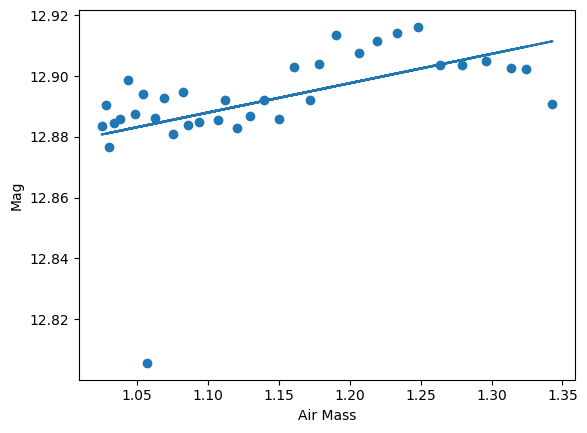

file cal_star_6_G_airmass.csv
params [ 0.09664851 12.78170762]
file cal_star_2_G_airmass.csv
params [ 0.16034453 10.74944874]
file cal_star_5_G_airmass.csv
params [ 0.02224027 12.65708698]
file cal_star_1_G_airmass.csv
params [ 0.15921431 10.75091866]
file cal_star_11_G_airmass.csv
params [ 0.05609299 14.0884601 ]
file cal_star_0_G_airmass.csv
params [ 0.14713552 10.76094926]
file cal_star_3_G_airmass.csv
params [ 0.15884664 10.75123635]
file cal_star_7_G_airmass.csv
params [8.56847845e-03 1.33482588e+01]


In [58]:
ext_coef = []
def linear(x,m,c):
    return m*x+c
counter = 0
for i in np.arange(len(os.listdir('airmass/R'))):
    list = os.listdir('airmass/G')
    df = pd.read_csv('airmass/G/'+list[i])
    average = np.mean(df['Mag'])
    for j in np.arange(len(df['Mag'])):
        check_mag = df['Mag'][j]-average
        if abs(check_mag) > 0.1:
            df = df.drop(j)
        
    if len(df['Mag']) < 3:
        continue

    popt, pcov = curve_fit(linear, df['Air Mass'], df['Mag'])
    if popt[0] < 0:
        continue
    if counter == 0:
        plt.scatter(df['Air Mass'], df['Mag'])
        plt.xlabel('Air Mass')
        plt.ylabel('Mag')
        plt.plot(df['Air Mass'], linear(df['Air Mass'], *popt))
        
        plt.show()
        counter += 1
    ext_coef.append(popt[0])
    print('file',list[i])
    print('params',popt)

In [56]:
print('extinction coefficient',np.mean(ext_coef), '±' , np.mean(ext_coef)/1.8*np.mean(np.sqrt(np.diag(pcov))))

extinction coefficient 0.10113640739989807 ± 0.0005814353246718487


In [61]:
from photometry import platesolve

platesolve('SX UMa','CHr I',True,False)

SX-UMa_LIGHT_2024-04-10T03-36-55Z_Chr-I_60s_-10.0C_E_0068.fits_c.fits
455
Solving.........Success
56 15 25.30 13 26 13.403
SX-UMa_LIGHT_2024-04-09T22-52-30Z_Chr-I_60s_-10.0C_W_0026.fits_c.fits
385
Solving..........Success
56 15 59.05 13 26 17.494
SX-UMa_LIGHT_2024-04-10T04-09-53Z_Chr-I_60s_-10.0C_E_0073.fits_c.fits
403
Solving...........Success
56 15 24.80 13 26 13.417
SX-UMa_LIGHT_2024-04-09T22-31-43Z_Chr-I_60s_-10.0C_W_0023.fits_c.fits
432
Solving..........Success
56 15 58.98 13 26 17.509
SX-UMa_LIGHT_2024-04-09T23-52-50Z_Chr-I_60s_-10.0C_W_0035.fits_c.fits
441
Solving......Success
56 15 59.12 13 26 17.476
SX-UMa_LIGHT_2024-04-10T01-09-39Z_Chr-I_60s_-10.0C_E_0046.fits_c.fits
457
Solving.......Success
56 15 25.01 13 26 13.388
SX-UMa_LIGHT_2024-04-10T02-43-29Z_Chr-I_60s_-9.9C_E_0060.fits_c.fits
447
Solving..........Success
56 15 25.05 13 26 13.388
SX-UMa_LIGHT_2024-04-09T20-50-16Z_Chr-I_60s_-10.0C_W_0008.fits_c.fits
386
Solving..........Success
56 15 59.32 13 26 17.493
SX-UMa_LIGHT_202

SX-UMa_LIGHT_2024-04-10T03-36-55Z_Chr-I_60s_-10.0C_E_0068.fits_c.fits
 id xcentroid ycentroid sharpness  ... sky    peak      flux        mag      
--- --------- --------- ---------- ... --- --------- --------- --------------
  1  1.580016 1.5802928 0.23026328 ...   0 32787.911 1568.5989     -7.9887797
454 1.5802063 997.41958 0.23004467 ...   0 32778.479 1568.4523     -7.9886783
  2 997.41966  1.580486 0.22999155 ...   0 32775.515  1567.967     -7.9883423
455 997.41915 997.41968 0.23006501 ...   0 32773.143 1567.5817     -7.9880754
262 66.235012 644.02877 0.48653586 ...   0 40215.641 339.43034     -6.3268766
203 12.112178 500.85094 0.50542284 ...   0 40097.675 328.11147     -6.2900535
205 480.81784 501.48785 0.50018402 ...   0 39455.554 293.40377     -6.1686642
374 887.83593 860.76564 0.46087079 ...   0 34325.569 72.030742     -4.6437947
 73 836.45184 177.49081 0.46983529 ...   0 33474.475 33.944536     -3.8269247
431 47.912947 961.22272 0.46435374 ...   0 33489.571 33.136619     -3.80

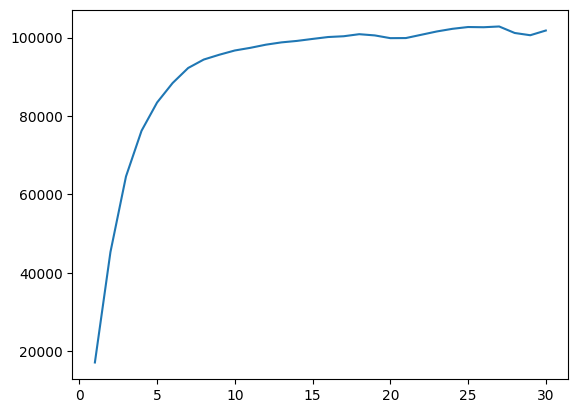

SX-UMa_LIGHT_2024-04-09T22-52-30Z_Chr-I_60s_-10.0C_W_0026.fits_c.fits
SX-UMa_LIGHT_2024-04-10T04-09-53Z_Chr-I_60s_-10.0C_E_0073.fits_c.fits
SX-UMa_LIGHT_2024-04-09T22-31-43Z_Chr-I_60s_-10.0C_W_0023.fits_c.fits
SX-UMa_LIGHT_2024-04-09T23-52-50Z_Chr-I_60s_-10.0C_W_0035.fits_c.fits
SX-UMa_LIGHT_2024-04-10T01-09-39Z_Chr-I_60s_-10.0C_E_0046.fits_c.fits
SX-UMa_LIGHT_2024-04-10T02-43-29Z_Chr-I_60s_-9.9C_E_0060.fits_c.fits
SX-UMa_LIGHT_2024-04-09T20-50-16Z_Chr-I_60s_-10.0C_W_0008.fits_c.fits
SX-UMa_LIGHT_2024-04-09T22-59-05Z_Chr-I_60s_-10.0C_W_0027.fits_c.fits
SX-UMa_LIGHT_2024-04-09T20-16-19Z_Chr-I_60s_-10.0C_W_0003.fits_c.fits
SX-UMa_LIGHT_2024-04-09T22-11-56Z_Chr-I_60s_-9.9C_W_0020.fits_c.fits
SX-UMa_LIGHT_2024-04-10T01-29-27Z_Chr-I_60s_-10.0C_E_0049.fits_c.fits
SX-UMa_LIGHT_2024-04-10T02-30-17Z_Chr-I_60s_-10.0C_E_0058.fits_c.fits
SX-UMa_LIGHT_2024-04-10T03-23-01Z_Chr-I_60s_-9.9C_E_0066.fits_c.fits
SX-UMa_LIGHT_2024-04-09T20-09-43Z_Chr-I_60s_-10.0C_W_0002.fits_c.fits
SX-UMa_LIGHT_2024-04-10

([2460410.6506365743,
  2460410.453125,
  2460410.6735300925,
  2460410.4386921297,
  2460410.495023148,
  2460410.5483680554,
  2460410.6135300924,
  2460410.3682407406,
  2460410.457696759,
  2460410.344664352,
  2460410.424953704,
  2460410.5621180558,
  2460410.604363426,
  2460410.640983796,
  2460410.3400810184,
  2460410.6089351852,
  2460410.3916550926,
  2460410.4203819446,
  2460410.4858680554,
  2460410.406099537,
  2460410.6598032406,
  2460410.3545138887,
  2460410.5855324073,
  2460410.525462963,
  2460410.4622800928,
  2460410.5946875,
  2460410.590104167,
  2460410.566701389,
  2460410.6552199074,
  2460410.543784722,
  2460410.429537037,
  2460410.517916667,
  2460410.513344907,
  2460410.539201389,
  2460410.4996064813,
  2460410.552962963,
  2460410.3870717594,
  2460410.3590856483,
  2460410.481284722,
  2460410.401527778,
  2460410.636412037,
  2460410.434108796,
  2460410.576377315,
  2460410.334791667,
  2460410.349236111,
  2460410.3969444446,
  2460410.47600694

In [10]:
from photometry import photometry

photometry('SX UMa','CHr I',14,6,False)

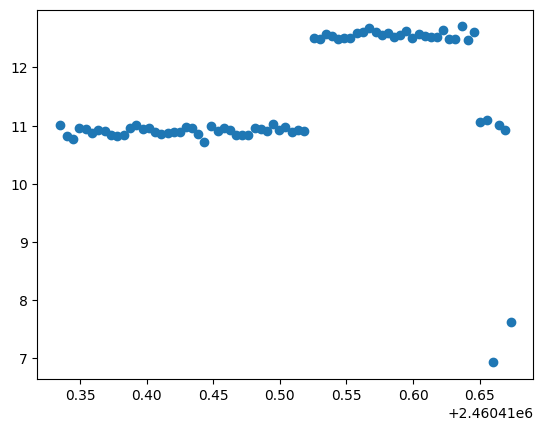

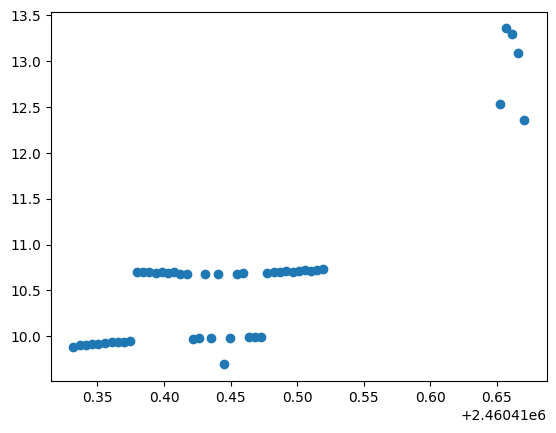

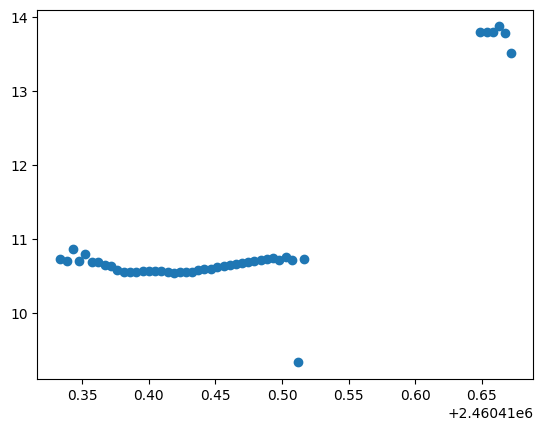

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('airmass/SX UMa/I/cal_star_6_I_airmass.csv')
plt.figure()
plt.scatter(df['JD'],df['Mag'])


df = pd.read_csv('airmass/SX UMa/G/cal_star_1_G_airmass.csv')
plt.figure()
plt.scatter(df['JD'],df['Mag'])


df = pd.read_csv('airmass/SX UMa/R/cal_star_4_R_airmass.csv')
plt.figure()
plt.scatter(df['JD'],df['Mag'])